# FOOD CARBON FOOTPRINT 

Climate change is at the center of boardroom discussions, on how the increased 
talk and regulation will impact businesses and how they can capitalize on this to 
be sustainable in the future and not treat it as an obstacle to growth. At an individual 
level we also share in the responsibility of making the right decisions that care for 
the future generations. The most effective way of doing this is to stay informed on what 
the major contributors to this 21st century menace is, and thereby make informed choices 
and shape policy. 

In this week's project you will be exploring food carbon emissions- The environmental 
impacts of our eating habits. 
[Food Carbon Footprint Index 2018 | nu3](https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018) Conducted a research on directly comparing different 
diets in terms of carbon dioxide emissions. The research, which reveals the annual CO2 
emissions per person for 130 nations worldwide, shows which countries could significantly 
reduce their carbon footprint by switching to a plant-based diet, as well as which food 
types generate the highest carbon dioxide emissions.

You will use this [data](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv) to explore the following:
- The average C02 emission per person by food category among five countries 
(Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa. Use this [image](https://pbs.twimg.com/media/ERSiKrBUcAACMrL?format=png&name=900x900)
- Highlight the marked difference between consumption and emissions in certain food 
product of your choice 
- The food consumption of animal and non-animal products and the impact on carbon 
footprint. Use this [image](https://pbs.twimg.com/media/ERSiKrBUcAACMrL?format=png&name=900x900)
- Beef's contribution to CO2 emissions (kg/person/year) - Map this. 
- A box plot and interpretation of the CO2 contributions of food levels. Use this [image](https://pbs.twimg.com/media/EROivo7UYAAygul?format=jpg&name=small) as inspiration 
- Top 10 Countries with highest emissions. Choose the appropriate visual type. Get inspiration from this [image](https://pbs.twimg.com/media/ERFZGueW4AEEwSo?format=png&name=large) 
- Use all your data to write a 500 words minimum of insights and the story behind your exploration. 
- Alternatively compile a set of slides with your insights. 


In [98]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [99]:
# Read the url and pass store it in variable df
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv'
df = pd.read_csv(url)

In [100]:
# Preview the data
df.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [101]:
df.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

In [102]:
df.info() #See column details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [103]:
df.describe()

,consumption,co2_emmission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


### The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.

1. Filter

In [104]:
# create a dataframe for east african countries
east_africa_df = df[df['country'].isin(['Kenya', 'Uganda', 'Tanzania', 'Ethiopia', 'Rwanda'])]
east_africa_df.shape

# The inverse will be a dataframe for the rest of the world
world_df = df[~df['country'].isin(['Kenya', 'Uganda', 'Ethiopia', 'Tanzania', 'Rwanda'])]
world_df.shape

(1375, 4)

2. Groupby

In [277]:
# To plot the average co2 per person by food category, I simply group the food category by the mean co2_emmission
east_africa_co2_emmission_per_person =east_africa_df.groupby('food_category')['co2_emmission'].mean().sort_values(ascending=True)
world_co2_emmission_per_person = world_df.groupby('food_category')['co2_emmission'].mean().sort_values(ascending=True)

3. Plot

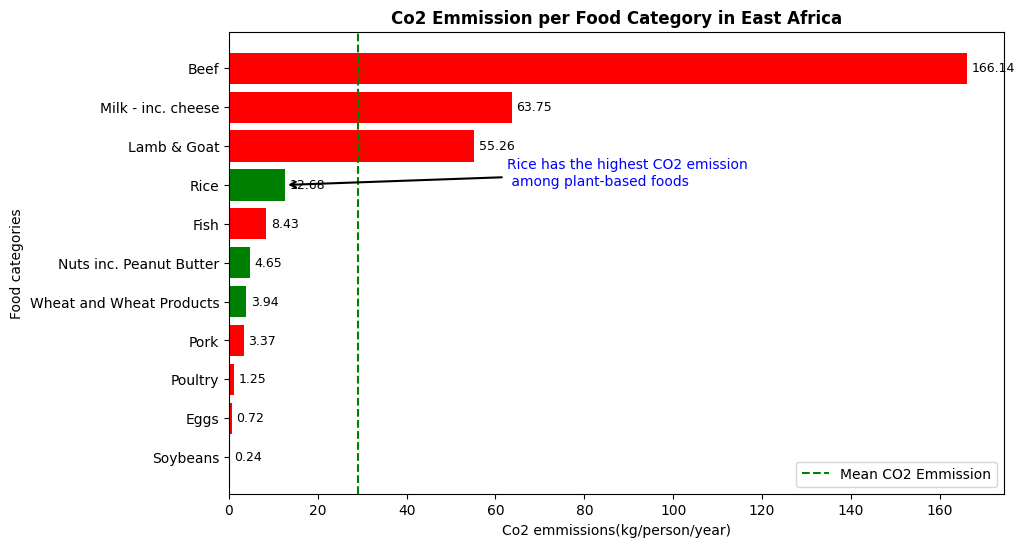

In [313]:
# Creating a tuple for plant based and animal based food categories
animal_based = {'Eggs', 'Poultry', 'Pork', 'Fish', 'Lamb & Goat', 'Milk - inc. cheese', 'Beef'}
plant_based = {'Soybeans', 'Wheat and Wheat Products', 'Rice'}

# Assigning colors for the animal and food based food categories
colors = ['red' if category in animal_based else 'green' for category in east_africa_co2_emmission_per_person.index]

# plotting co2 emmission in east africa
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(east_africa_co2_emmission_per_person.index, east_africa_co2_emmission_per_person, color=colors)

# Annotate bars
for bar in bars:
    width = bar.get_width()  # Get the value of the bar (Consumption)
    ax.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

# Add a verticle line to show the mean
ax.axvline(x=np.mean(east_africa_co2_emmission_per_person), color='g', linestyle='--', label='Mean CO2 Emmission')

# Set title and x and y labels
ax.set_title('Co2 Emmission per Food Category in East Africa', weight = 'bold' )
ax.set_ylabel('Food categories')
ax.set_xlabel('Co2 emmissions(kg/person/year)')

# Add anotaion to show that 'Rice' category has the highest co2 emmission among plant based category
rice_category = "Rice"
rice_value = east_africa_co2_emmission_per_person[rice_category]
ax.annotate(
    'Rice has the highest CO2 emission\n among plant-based foods',
    xy=(rice_value, rice_category),  # Pointing to the rice bar
    xytext=(rice_value + 50, rice_category),  # Adjust text position
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
    fontsize=10, color='blue', fontweight='regular'
)
ax.legend()
# Show plot
plt.show()

### Comparing Co2 emmissions in Africa to the rest of the world

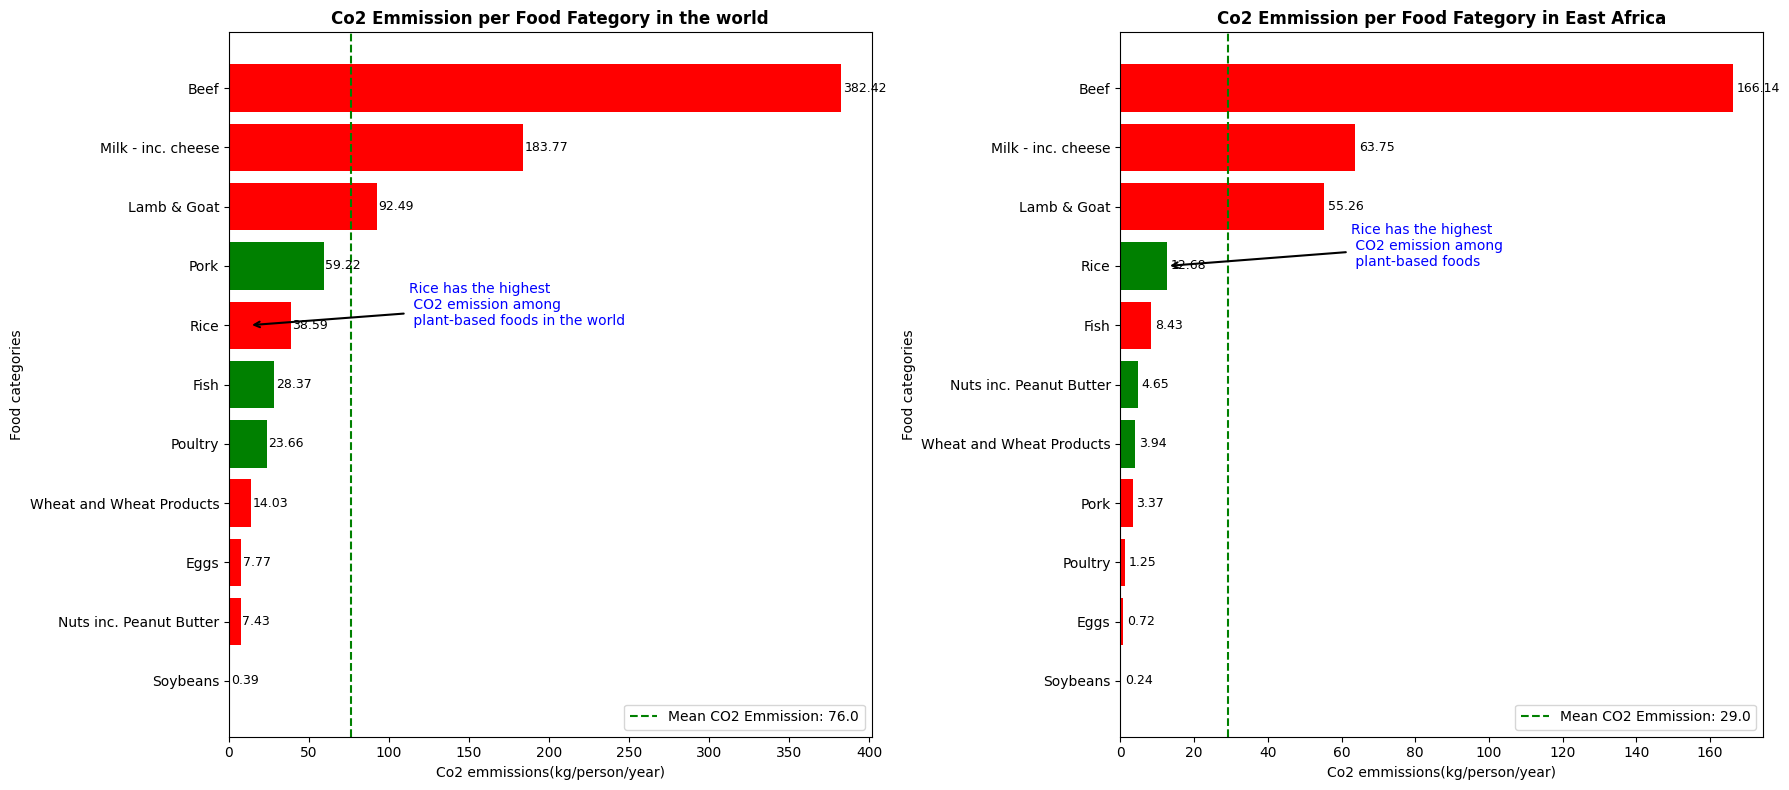

In [306]:
# Creating a tuple for plant based and animal based food categories
animal_based = {'Eggs', 'Poultry', 'Pork', 'Fish', 'Lamb & Goat', 'Milk - inc. cheese', 'Beef'}
plant_based = {'Soybeans', 'Wheat and Wheat Products', 'Rice'}

# Assigning colors for the animal and food based food categories
colors = ['red' if category in animal_based else 'green' for category in east_africa_co2_emmission_per_person.index]

# plotting co2 emmission in east africa
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
ea_bar = ax[1].barh(east_africa_co2_emmission_per_person.index, east_africa_co2_emmission_per_person, color=colors)
world_bar = ax[0].barh(world_co2_emmission_per_person.index, world_co2_emmission_per_person, color=colors)

for bar in ea_bar:
    width = bar.get_width()  # Get the value of the bar (Consumption)
    ax[1].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

for bar in world_bar:
    width = bar.get_width()  # Get the value of the bar (CO₂ Emission)
    ax[0].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

# Add a verticle line to show the mean
ax[0].axvline(x=np.mean(world_co2_emmission_per_person), color='g', linestyle='--', label=f'Mean CO2 Emmission: {np.mean(world_co2_emmission_per_person).round()}')
ax[1].axvline(x=np.mean(east_africa_co2_emmission_per_person), color='g', linestyle='--', label=f'Mean CO2 Emmission: {np.mean(east_africa_co2_emmission_per_person).round()}')

# Set title and x and y labels
# Set title and x and y labels
ax[0].set_title('Co2 Emmission per Food Fategory in the world', weight = 'bold' )
ax[0].set_ylabel('Food categories')
ax[0].set_xlabel('Co2 emmissions(kg/person/year)')
ax[1].set_title('Co2 Emmission per Food Fategory in East Africa', weight = 'bold' )
ax[1].set_ylabel('Food categories')
ax[1].set_xlabel('Co2 emmissions(kg/person/year)')

# Add anotaion to show that 'Rice' category has the highest co2 emmission among plant based category
rice_category = "Rice"
rice_value = east_africa_co2_emmission_per_person[rice_category]
ax[0].annotate(
    'Rice has the highest\n CO2 emission among \n plant-based foods in the world',
    xy=(rice_value, rice_category),  # Pointing to the rice bar
    xytext=(rice_value + 100, rice_category),  # Adjust text position
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
    fontsize=10, color='blue', fontweight='regular'
)
ax[1].annotate(
    'Rice has the highest\n CO2 emission among \n plant-based foods',
    xy=(rice_value, rice_category),  # Pointing to the rice bar
    xytext=(rice_value + 50, rice_category),  # Adjust text position
    arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
    fontsize=10, color='blue', fontweight='regular'
)
ax[0].legend()
ax[1].legend()
# Show plot
plt.tight_layout()
plt.show()

### Highlight the marked difference between consumption and emissions in certain food product of your choice 

1. Group

In [302]:
# I group food category by consumption in the east africa df
east_africa_consumption_per_person = east_africa_df.groupby('food_category')['consumption'].mean().sort_values(ascending=True)

2. Plot

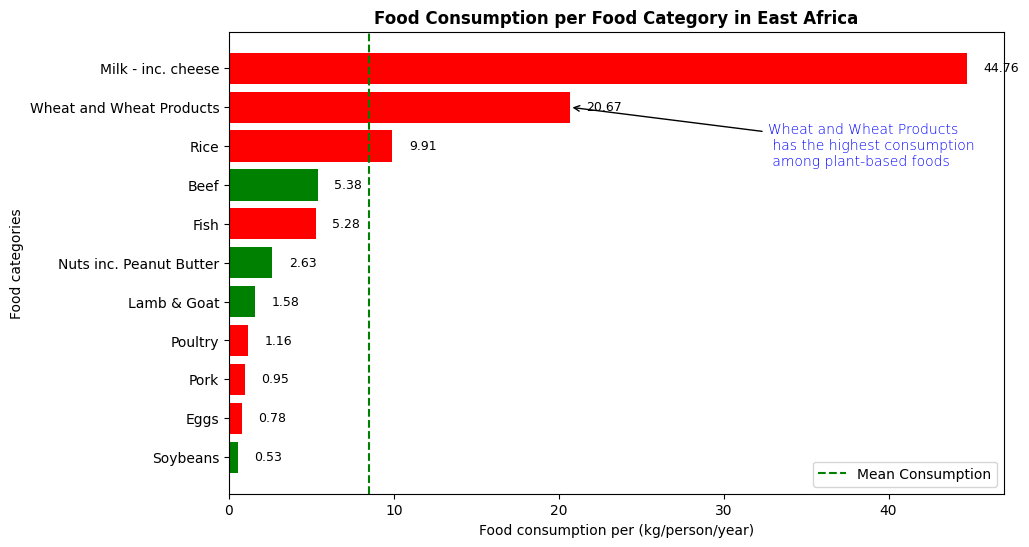

In [316]:
# Creating a tuple for plant based and animal based food categories
animal_based = {'Eggs', 'Poultry', 'Pork', 'Fish', 'Lamb & Goat', 'Milk - inc. cheese', 'Beef'}
plant_based = {'Soybeans', 'Wheat and Wheat Products', 'Rice'}

# Assining colors for the animal and food based food categories
colors = ['red' if category in animal_based else 'green' for category in east_africa_co2_emmission_per_person.index]

# plotting co2 emmission in east africa
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(east_africa_consumption_per_person.index, east_africa_consumption_per_person, color=colors)

for bar in bars:
    width = bar.get_width()  # Get the value of the bar (Consumption)
    ax.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

# Add a verticle line to show the mean
ax.axvline(x=np.mean(east_africa_consumption_per_person), color='g', linestyle='--', label='Mean Consumption')

# Set title and x and y labels
ax.set_title('Food Consumption per Food Category in East Africa', weight = 'bold' )
ax.set_ylabel('Food categories')
ax.set_xlabel('Food consumption per (kg/person/year)')

# Add anotaion to show that 'Rice' category has the highest co2 emmission among plant based category

plant_category = "Wheat and Wheat Products"
plant_value = east_africa_consumption_per_person[plant_category]
plant_category_index = east_africa_consumption_per_person.index.get_loc(plant_category) # Get the numeric index position of 'Wheat and Wheat Products' in the DataFrame

ax.annotate(
    'Wheat and Wheat Products \n has the highest consumption \n among plant-based foods',
    xy=(plant_value, plant_category),  # Pointing to the wheat bar
    xytext=(plant_value + 12, plant_category_index - 1.5),  # Move annotation down
    arrowprops=dict(arrowstyle="->", color="black", lw=1.0),
    fontsize=10, color='blue', fontweight='light'
)
ax.legend()
# Show plot
plt.show()

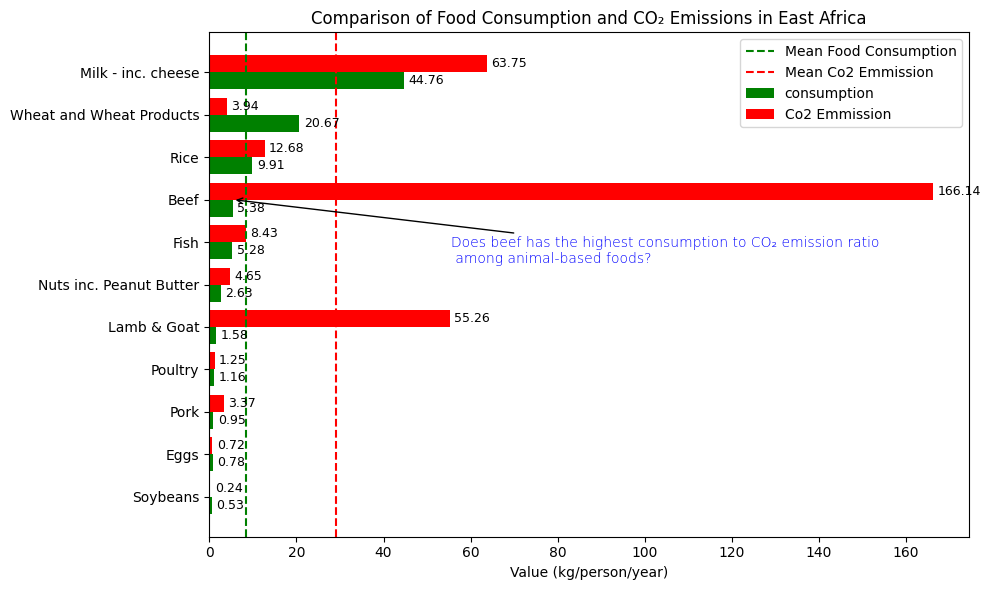

In [109]:
# To highlight the marked difference, I will create a grouped bar plot 
bar_width  = 0.4
consumption_color = 'green'
emmission_color = 'red'

# I find the mean of co2 emmission and food consumptions 

east_africa_df_emmission_consumption =  east_africa_df.groupby('food_category')[['co2_emmission', 'consumption']].mean().sort_values(by = 'consumption', ascending=True)

index = np.arange(len(east_africa_df_emmission_consumption))

# east_africa_df_emmission_consumption.plot(kind = 'bar')
fig, ax = plt.subplots(figsize = (10,6))
consumption_bar = ax.barh(index - bar_width/2, east_africa_df_emmission_consumption['consumption'], bar_width, label = 'consumption', color = 'green')
Emmission_bar = ax.barh(index + bar_width/2, east_africa_df_emmission_consumption['co2_emmission'], bar_width, label = 'Co2 Emmission', color = 'red')

# Add axvline for each
ax.axvline(x=np.mean(east_africa_df_emmission_consumption['consumption']), label = 'Mean Food Consumption', linestyle = '--', color = 'green')
ax.axvline(x=np.mean(east_africa_df_emmission_consumption['co2_emmission']), label= 'Mean Co2 Emmission', linestyle = '--', color = 'red')

# Add annotations on top of each bar
for bar in consumption_bar:
    width = bar.get_width()  # Get the value of the bar (Consumption)
    ax.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

for bar in Emmission_bar:
    width = bar.get_width()  # Get the value of the bar (CO₂ Emission)
    ax.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', fontsize=9, color='black')

# Get the animal category and its value
animal_category = "Beef"
animal_value = east_africa_df_emmission_consumption.loc[animal_category, 'consumption']
animal_category_index = east_africa_df_emmission_consumption.index.get_loc(animal_category)

# Annotate the 'Beef' bar
ax.annotate(
    'Does beef has the highest consumption to CO₂ emission ratio \n among animal-based foods?',
    xy=(animal_value, animal_category_index),  # Position of 'Beef' bar
    xytext=(animal_value + 50, animal_category_index - 1.5),  # Adjust annotation position
    arrowprops=dict(arrowstyle="->", color="black", lw=1.0),
    fontsize=10, color='blue', fontweight='light'
)

# Set y-axis ticks and labels properly
ax.set_yticks(index)
ax.set_yticklabels(east_africa_df_emmission_consumption.index)  # Food category names

# Labels and Title
ax.set_xlabel("Value (kg/person/year)")
ax.set_title("Comparison of Food Consumption and CO₂ Emissions in East Africa")
ax.legend()

plt.tight_layout()
plt.show()

In [110]:
# Create a column called consumption to emmission ratio
# I will calculate this ratio by dividing the co2 emmission by consumption 
east_africa_df_emmission_consumption[
    'consumption_to_emmission_ratio'] = east_africa_df_emmission_consumption[
        'co2_emmission']/east_africa_df_emmission_consumption['consumption']


In [111]:
east_africa_df_emmission_consumption.head(10)

,co2_emmission,consumption,consumption_to_emmission_ratio
food_category,,,
Soybeans,0.236,0.526,0.448669
Eggs,0.718,0.782,0.918159
Pork,3.370,0.952,3.539916
Poultry,1.250,1.164,1.073883
Lamb & Goat,55.262,1.578,35.020279
Nuts inc. Peanut Butter,4.650,2.628,1.769406
Fish,8.428,5.278,1.596817
Beef,166.138,5.384,30.857727
Rice,12.680,9.908,1.279774


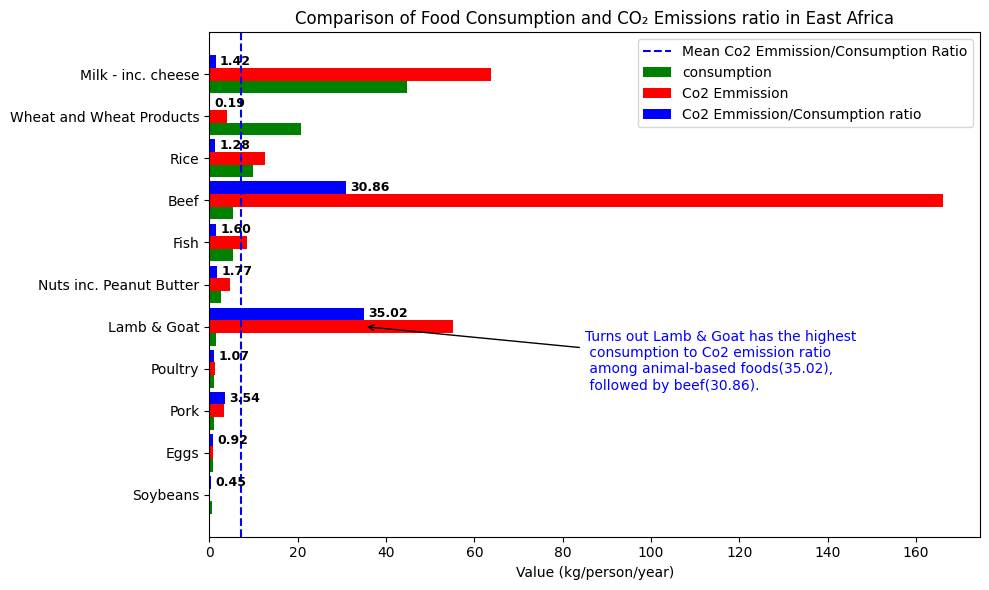

In [317]:
# To highlight the marked difference, I will create a grouped bar plot 
# I will group the food category by co2 emmission, consumption and consumption to emmission ratio 
# Then I will find the mean of co2 emmission and food consumptions 
east_africa_df_emmission_consumption_ratio =  east_africa_df_emmission_consumption.groupby('food_category')[['co2_emmission', 'consumption','consumption_to_emmission_ratio']].mean().sort_values(by = 'consumption', ascending=True)

# Initialize a barwidth of 0.3 to offset the bars 
bar_width  = 0.3
index = np.arange(len(east_africa_df_emmission_consumption)) 

# Plot
fig, ax = plt.subplots(figsize = (10,6))
consumption_bar = ax.barh(index - bar_width, east_africa_df_emmission_consumption['consumption'], bar_width, label = 'consumption', color = 'green')
Emmission_bar = ax.barh(index, east_africa_df_emmission_consumption['co2_emmission'], bar_width, label = 'Co2 Emmission', color = 'red')
e_c_ratio = ax.barh(index + bar_width, east_africa_df_emmission_consumption['consumption_to_emmission_ratio'], bar_width, label = 'Co2 Emmission/Consumption ratio', color = 'blue')

# Add axvline
ax.axvline(x=np.mean(east_africa_df_emmission_consumption['consumption_to_emmission_ratio']), label= 'Mean Co2 Emmission/Consumption Ratio', linestyle = '--', color = 'blue')

for bar in e_c_ratio:
    width = bar.get_width()  # Get the value of the bar (CO₂ Emission)
    ax.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', weight='bold', fontsize=9, color='black')

# Get the animal category and its value
animal_category = "Lamb & Goat"
animal_value = east_africa_df_emmission_consumption.loc[animal_category, 'consumption_to_emmission_ratio']
animal_category_index = east_africa_df_emmission_consumption.index.get_loc(animal_category)

# Annotate the 'Beef' bar
ax.annotate(
    'Turns out Lamb & Goat has the highest \n consumption to Co2 emission ratio \n among animal-based foods(35.02), \n followed by beef(30.86).',
    xy=(animal_value, animal_category_index),  # Position of 'Lamb and Goat' bar
    xytext=(animal_value + 50, animal_category_index - 1.5),  # Adjust annotation position
    arrowprops=dict(arrowstyle="->", color="black", lw=1.0),
    fontsize=10, color='blue', fontweight='regular'
)

# Set y-axis ticks and labels properly
ax.set_yticks(index)
ax.set_yticklabels(east_africa_df_emmission_consumption.index)  # Food category names

# Labels and Title
ax.set_xlabel("Value (kg/person/year)")
ax.set_title("Comparison of Food Consumption and CO₂ Emissions ratio in East Africa")
ax.legend()

plt.tight_layout()
plt.show()

### Beef's contribution to CO2 emissions (kg/person/year) - Map this. 

In [113]:
# %pip install geopandas #Install geopandas inline
import geopandas as gpd 

In [114]:
# read the world json df
world = gpd.read_file('country_shapes.geojson') 
world_data = gpd.GeoDataFrame(world, geometry='geometry') # convert into a geodataframe

In [115]:
# Here I proceed to perform an inner join to remove all missing values
merged_world_df = df.merge(
    world_data, how='inner', left_on='country', right_on='cntry_name',
        suffixes=('_left', '_right'))

In [116]:
merged_world_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   country        1342 non-null   object  
 1   food_category  1342 non-null   object  
 2   consumption    1342 non-null   float64 
 3   co2_emmission  1342 non-null   float64 
 4   geo_point_2d   1342 non-null   object  
 5   cntry_name     1342 non-null   object  
 6   join_name      1342 non-null   object  
 7   iso2_2         77 non-null     object  
 8   iso_a2         1232 non-null   object  
 9   iso2           1342 non-null   object  
 10  cou_iso3_code  1342 non-null   object  
 11  iso3           1342 non-null   object  
 12  geometry       1342 non-null   geometry
dtypes: float64(2), geometry(1), object(10)
memory usage: 136.4+ KB


In [117]:
# From this data to get only data where food category is equal to beef 
beef_df = merged_world_df[merged_world_df['food_category'] == 'Beef']

# Set country as index column
beef_df = beef_df.set_index('country')

In [118]:
beef_df.head()

,food_category,consumption,co2_emmission,geo_point_2d,cntry_name,join_name,iso2_2,iso_a2,iso2,cou_iso3_code,iso3,geometry
country,,,,,,,,,,,,
Argentina,Beef,55.48,1712.00,"{ ""lon"": -65.167682715300003, ""lat"": -35.37618...",Argentina,Argentina,None,AR,AR,ARG,ARG,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
Australia,Beef,33.86,1044.85,"{ ""lon"": 134.48956278200001, ""lat"": -25.734968...",Australia,Australia,None,AU,AU,AUS,AUS,"MULTIPOLYGON (((142.27997 -10.26556, 142.21053..."
Albania,Beef,22.50,694.30,"{ ""lon"": 20.0683841514, ""lat"": 41.142284591200...",Albania,Albania,None,AL,AL,ALB,ALB,"POLYGON ((20.79192 40.43154, 20.78722 40.39472..."
Iceland,Beef,13.36,412.26,"{ ""lon"": -18.605466796200002, ""lat"": 64.997588...",Iceland,Iceland,None,IS,IS,ISL,ISL,"POLYGON ((-22.02472 64.41888, -22.02444 64.443..."
New Zealand,Beef,22.49,693.99,"{ ""lon"": 171.77990231000001, ""lat"": -41.838873...",New Zealand,New Zealand,None,NZ,NZ,NZL,NZL,"MULTIPOLYGON (((177.91779 -38.9428, 177.9097 -..."


In [119]:
beef_df.columns

Index(['food_category', 'consumption', 'co2_emmission', 'geo_point_2d',
       'cntry_name', 'join_name', 'iso2_2', 'iso_a2', 'iso2', 'cou_iso3_code',
       'iso3', 'geometry'],
      dtype='object')

In [120]:
# Group by country and calculate the mean of 'co2_emmission' for each country
beef_by_country = beef_df.groupby('country')[['co2_emmission']].mean()

# Merge the result back with the geometry
beef_by_country_with_geom = beef_df.groupby('country').agg({'co2_emmission': 'mean', 'geometry': 'first'})
beef_by_country_with_geom.shape

(122, 2)

In [121]:
# Ensure your DataFrame is a GeoDataFrame
beef_gdf = gpd.GeoDataFrame(beef_by_country_with_geom, geometry='geometry')
beef_by_country_with_geom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, Albania to Zimbabwe
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   co2_emmission  122 non-null    float64 
 1   geometry       122 non-null    geometry
dtypes: float64(1), geometry(1)
memory usage: 2.9+ KB


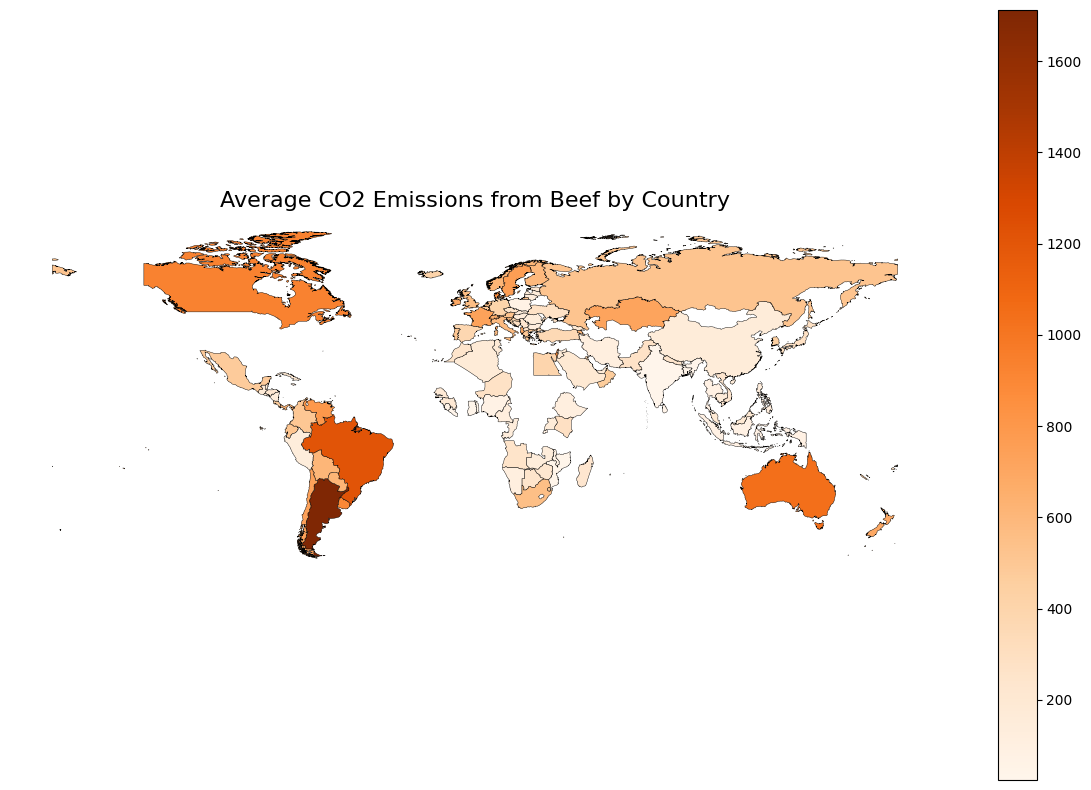

In [122]:
# Create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the choropleth map
beef_gdf.plot(column='co2_emmission',
              cmap='Oranges',             # Color scheme
              legend=True,
              edgecolor='black',       # Country border color
              linewidth=0.3,           # Border thickness
              missing_kwds={'color': 'lightgrey'},  # Color for missing data
              ax=ax)

# Add the title and remv
plt.title('Average CO2 Emissions from Beef by Country', fontsize=16)
ax.set_axis_off()  # Remove axes
plt.box(False)     # Remove figure border

# Show legend with label
legend = ax.get_legend()
if legend:
    legend.set_title('CO2 Emissions (kg)')

plt.show()

### A box plot and interpretation of the CO2 contributions of food levels. Use this [image](https://pbs.twimg.com/media/EROivo7UYAAygul?format=jpg&name=small) as inspiration 

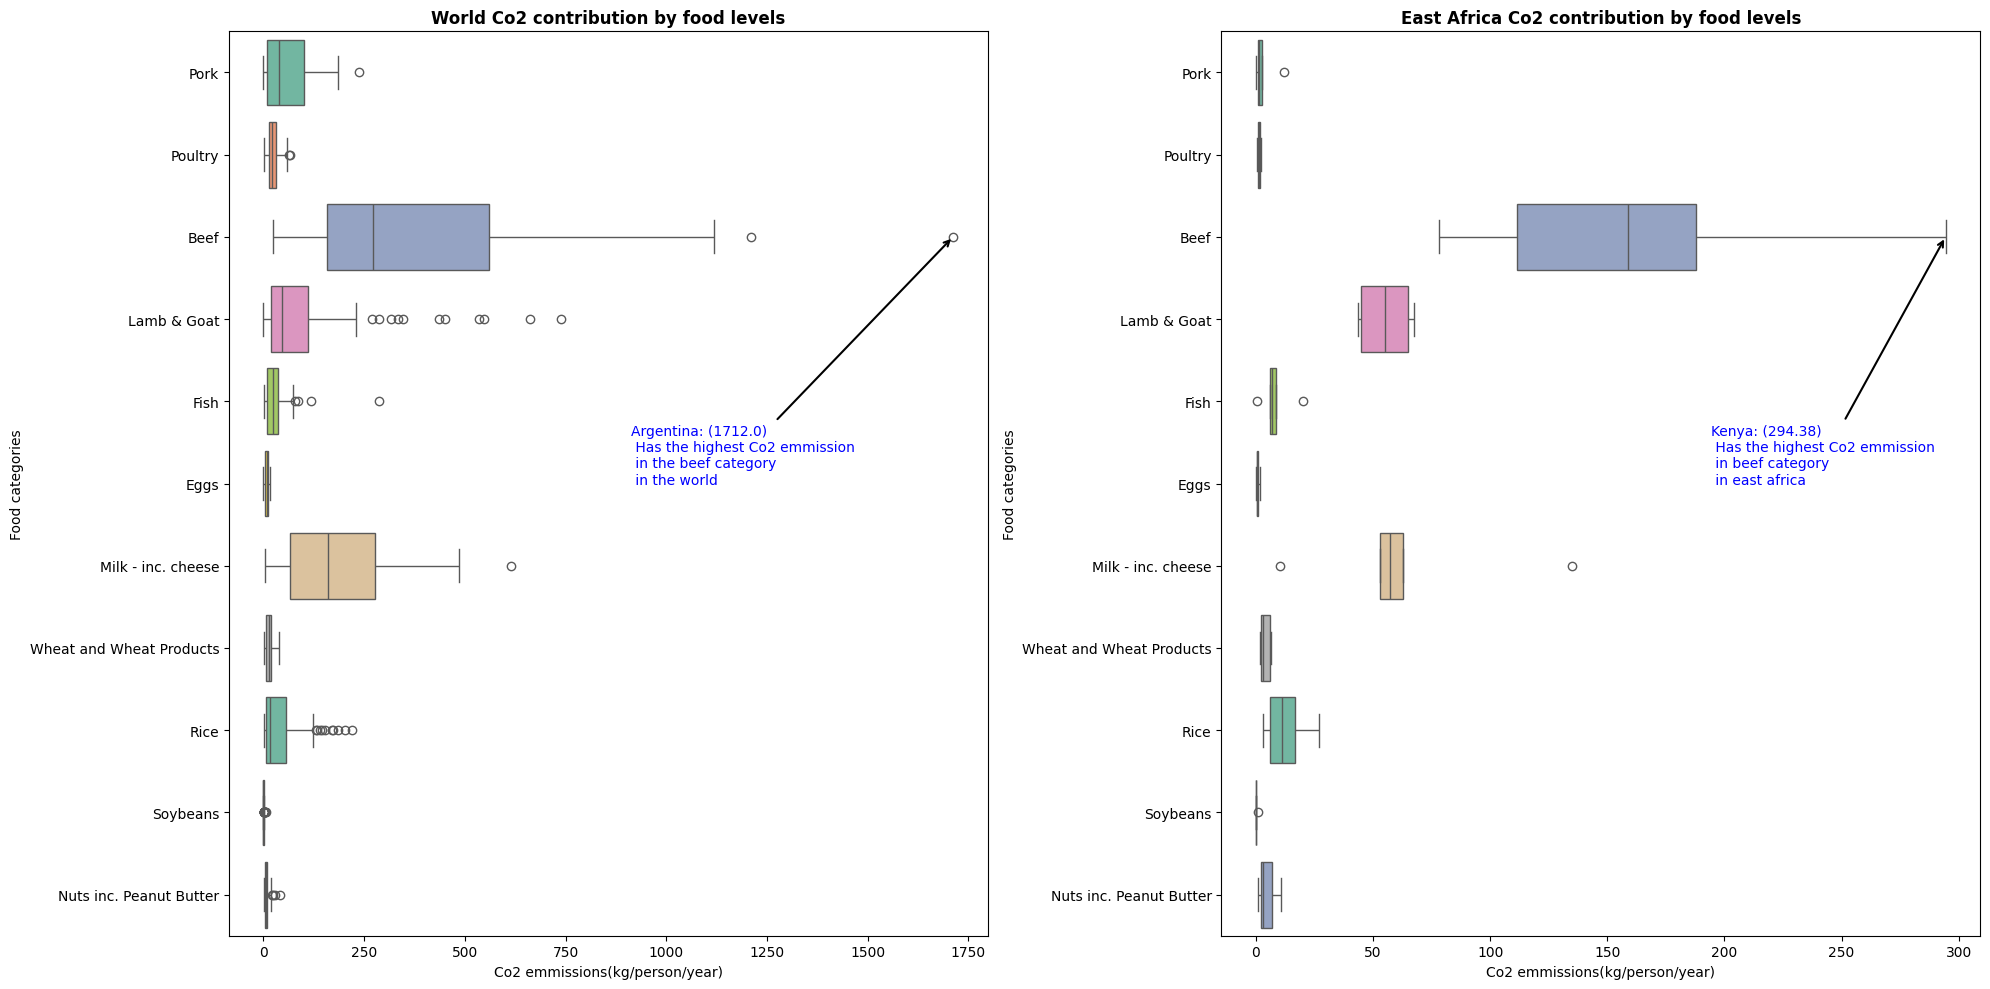

In [276]:
# Create a plot
fig, ax = plt.subplots(1,2, figsize=(20,10))

# I define a color palette (this will generate a different color for each food category)
food_categories_east_africa = east_africa_df['food_category']
food_categories_world = world_df['food_category']

# Use a color palette for unique colors for each category
palette_east_africa = sns.color_palette("Set2", len(food_categories_east_africa.unique()))
palette_world = sns.color_palette("Set2", len(food_categories_world.unique()))

# World df plot
sns.boxplot(data=world_df, y='food_category', x='co2_emmission', palette=palette_world, hue='food_category',ax=ax[0])
ax[0].set_title('World Co2 contribution by food levels', weight='bold')
ax[0].set_ylabel('Food categories')
ax[0].set_xlabel('Co2 emmissions(kg/person/year)')

# East africa plot 
sns.boxplot(data=east_africa_df, y='food_category', x='co2_emmission', palette=palette_east_africa,hue='food_category', ax=ax[1])
ax[1].set_title('East Africa Co2 contribution by food levels', weight='bold')
ax[1].set_ylabel('Food categories')
ax[1].set_xlabel('Co2 emmissions(kg/person/year)')

# Get the max co2 Emmission for each df
easmax = east_africa_df['co2_emmission'].max()
worldmax = world_df['co2_emmission'].max()

# Annotate the highest CO2 emission in World plot with country name
for j, value in enumerate(world_df['co2_emmission']):
    if value == worldmax:  # Condition to annotate the highest CO2 emission
        country = world_df['country'].iloc[j]  # Get the corresponding country/food category
        ax[0].annotate(
            f'{country}: ({value}) \n Has the highest Co2 emmission\n in the beef category \n in the world',  # Text to show (country and emission value)
            xy=(value, j),  # The position of the arrow (x = value, y = index)
            xytext=(value - 800, j +3),  # Where the text will be placed
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),  # Customize arrow style
            fontsize=10, color='blue', fontweight='regular'  # Text style
        )

# Annotate the highest CO2 emission in East Africa plot with country name
for i, value in enumerate(east_africa_df['co2_emmission']):
    if value == easmax:  # Condition to annotate the highest CO2 emission
        country = east_africa_df['country'].iloc[i]  # Get the corresponding country/food category
        ax[1].annotate(        
            f'{country}: ({value})\n Has the highest Co2 emmission \n in beef category \n in east africa',  # Text to show (country and emission value)
            xy=(value, i),  # The position of the arrow (x = value, y = index)
            xytext=(value - 100 , i + 3),  # Where the text will be placed
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),  # Customize arrow style
            fontsize=10, color='blue', fontweight='regular'  # Text style
        )

plt.tight_layout()
plt.show()

- Top 10 Countries with highest emissions. Choose the appropriate visual type. Get inspiration from this [image](https://pbs.twimg.com/media/ERFZGueW4AEEwSo?format=png&name=large) 

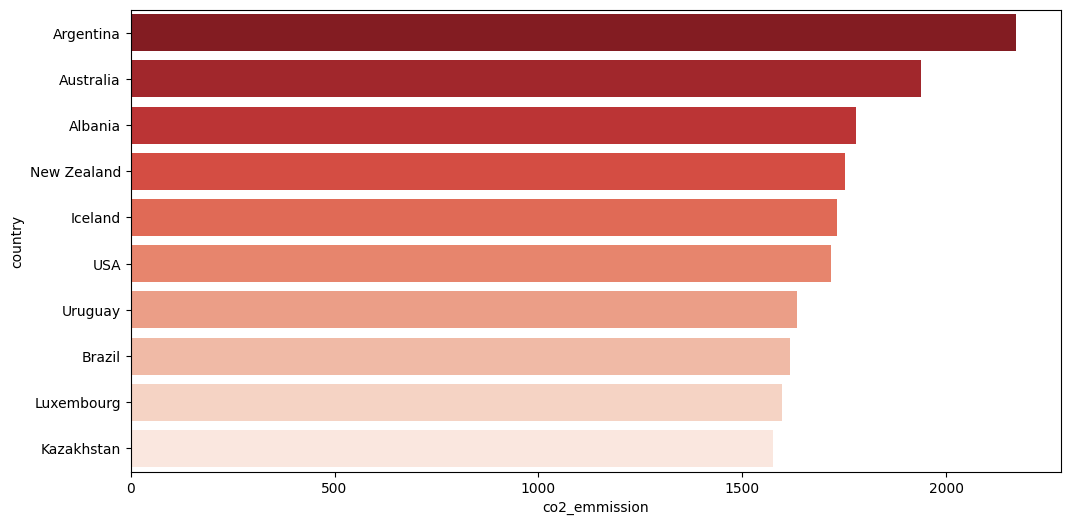

In [151]:
# I group country by the sum co2 emmission
highest_emmission = df.groupby('country')['co2_emmission'].sum()
# I sort values by ascending and pick top ten countries
highest_emmission = highest_emmission.sort_values(ascending=False).head(10) 
# I convert the grouped data into a pandas df 
highest_emmission_df = pd.DataFrame(highest_emmission)

# Plotting 
fig, ax =plt.subplots(figsize = (12,6))
sns.barplot(
    data = highest_emmission_df,
     y = 'country',
      x = 'co2_emmission',
       palette='Reds_r',
        hue='country',
         ax=ax)
plt.show()

- Use all your data to write a 500 words minimum of insights and the story behind your exploration. 
- Alternatively compile a set of slides with your insights. 